Recently, I have been running more python code than running irl. But yesterday I joined the "5vös5" event in Budapest, where a few hundred people from Eötvös Loránd University (ELTE), other universities, schools, and the nearby Ericsson office started at 5:05 pm to run 5 km around the university buildings.

I have checked the available data of the event (https://fairtiming.hu/php/results.php?vrs=5v5_23osz) and dived into it.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./resources/2023-osz-5vos5.csv', header = None)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       691 non-null    int64 
 1   1       364 non-null    object
 2   2       691 non-null    object
 3   3       691 non-null    object
 4   4       691 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.1+ KB
None


,0,1,2,3,4
0,77,NaN,Egyéb,Férfi,0:14:28
1,752,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Férfi,0:15:44
2,842,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Férfi,0:16:08
3,607,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Férfi,0:16:08
4,748,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Férfi,0:17:05


I have already removed all names from the dataset. I will also help with translating from the exotic Hungarian language.

In [3]:
df.rename(columns={0:'id',1:'organization',2:'job_title',3:'sex',4:'time'}, inplace = True)
df['sex'] = df['sex'].apply(lambda sex: 'Male' if sex == 'Férfi' else 'Female')
df.head()

,id,organization,job_title,sex,time
0,77,NaN,Egyéb,Male,0:14:28
1,752,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Male,0:15:44
2,842,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Male,0:16:08
3,607,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Male,0:16:08
4,748,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Male,0:17:05


Let's extract some features.

In [4]:
df[['organization','id']].groupby('organization').count().sort_values('id', ascending=False).head(10)

,id
organization,
Eötvös Loránd Tudományegyetem,303
Budapesti Műszaki és Gazdaságtudományi Egyetem,16
Semmelweis Egyetem,5
Budapesti Corvinus Egyetem,4
Fazekas Mihály Ált. Isk. és Gimn.,4
Pázmány Péter Katolikus Egyetem,3
Budapesti Gazdasági Egyetem,2
Óbudai Egyetem,2
Budai Ciszterci Szent Imre Gimnázium,2


In [5]:
def organizationType(s):
    if s is None:
        return 'other'
    if type(s) != str:
        return 'other'
    if 'gimn' in s.lower():
        return 'high school'
    if 'isk' in s.lower() or 'szakkép' in s.lower():
        return 'elementary school'
    if 'egyetem' in s.lower():
        return 'university'
    return 'other'

In [6]:
for org in df['organization'].unique():
    print(org, organizationType(org))

nan other
Eötvös Loránd Tudományegyetem university
Óbudai Árpád Gimnázium high school
Budai Ciszterci Szent Imre Gimnázium high school
Semmelweis Egyetem Bókay János Többcélú Szakképző Intézménye elementary school
Lovassy László Gimnázium- Veszprém high school
Budapesti Műszaki és Gazdaságtudományi Egyetem university
Károli Gáspár Református Egyetem university
Fazekas Mihály Ált. Isk. és Gimn. high school
Semmelweis Egyetem university
Testnevelési Egyetem university
Budapesti Corvinus Egyetem university
Páduai Szent Antal Iskola- Piliscsaba elementary school
Pázmány Péter Katolikus Egyetem university
Óbudai Egyetem university
Eötvös József Gimnázium- Budapest high school
Kelenvölgyi Általános Iskola elementary school
ELTE Gyertyánffy István Gyakorló Általános Iskola elementary school
Budapesti Gazdasági Egyetem university
Gárdonyi Géza Általános Iskola elementary school
Nemzeti Közszolgálati Egyetem university
ll. Rákóczi Ferenc gimnázium high school
Újbudai József Attila Gimnázium hig

In [7]:
df['org_type'] = df['organization'].apply(organizationType)
df.head()

,id,organization,job_title,sex,time,org_type
0,77,NaN,Egyéb,Male,0:14:28,other
1,752,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Male,0:15:44,university
2,842,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Male,0:16:08,university
3,607,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Male,0:16:08,university
4,748,Eötvös Loránd Tudományegyetem,Egyetemi hallgató,Male,0:17:05,university


In [8]:
df['job_title'].unique()

array(['Egyéb', 'Egyetemi hallgató', 'Közoktatásban tanuló',
       'Egyetemi alkalmazott', 'Doktorandusz hallgató'], dtype=object)

In [9]:
def jobType(s):
    if s is None:
        return 'other'
    if type(s) != str:
        return 'other'
    if s == 'Közoktatásban tanuló':
        return 'school student' #elementary school or high school
    if s == 'Egyetemi hallgató':
        return 'university student' #bachelor or masters
    if s =='Doktorandusz hallgató':
        return 'phd student'
    if s == 'Egyetemi alkalmazott':
        return 'university employee'
    return 'other'

df['job_title'] = df['job_title'].apply(jobType)
df.head()

,id,organization,job_title,sex,time,org_type
0,77,NaN,other,Male,0:14:28,other
1,752,Eötvös Loránd Tudományegyetem,university student,Male,0:15:44,university
2,842,Eötvös Loránd Tudományegyetem,university student,Male,0:16:08,university
3,607,Eötvös Loránd Tudományegyetem,university student,Male,0:16:08,university
4,748,Eötvös Loránd Tudományegyetem,university student,Male,0:17:05,university


In [10]:
df['time'] = df['time'].apply(lambda t: int(t.split(':')[1])+int(t.split(':')[2])/60.0)
df.head()

,id,organization,job_title,sex,time,org_type
0,77,NaN,other,Male,14.466667,other
1,752,Eötvös Loránd Tudományegyetem,university student,Male,15.733333,university
2,842,Eötvös Loránd Tudományegyetem,university student,Male,16.133333,university
3,607,Eötvös Loránd Tudományegyetem,university student,Male,16.133333,university
4,748,Eötvös Loránd Tudományegyetem,university student,Male,17.083333,university


We have a few meaningful categories to explore: the distributions of times split by job_title, org_type and sex. For the organization we could compare ELTE with non-ELTE. If we had the data for Ericsson employees, that would be another useful category.

count    691.000000
mean      27.260154
std        5.432360
min       14.466667
25%       23.316667
50%       26.500000
75%       30.816667
max       46.350000
Name: time, dtype: float64


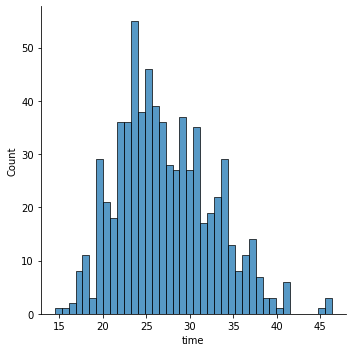

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print(df['time'].describe())
sns.displot(data=df, x='time', bins=40)

By the histogram, probably running in 20 minutes is a personal goal for many?

<AxesSubplot:xlabel='org_type', ylabel='count'>

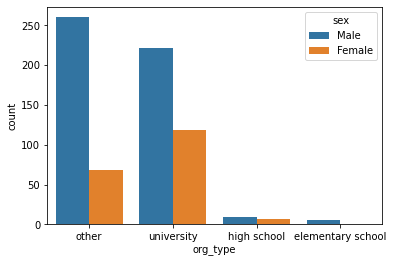

In [13]:
sns.countplot(data=df, x='org_type', hue='sex')

<AxesSubplot:xlabel='job_title', ylabel='count'>

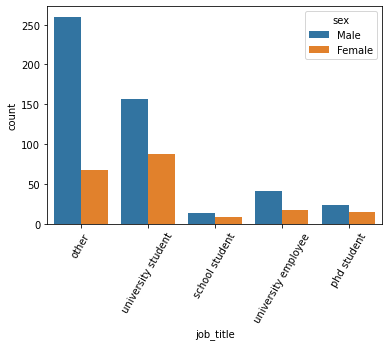

In [14]:
job_count = sns.countplot(data=df, x='job_title', hue='sex')
job_count.set_xticklabels(job_count.get_xticklabels(), rotation=60)
job_count

AxesSubplot(0.125,0.125;0.775x0.755)


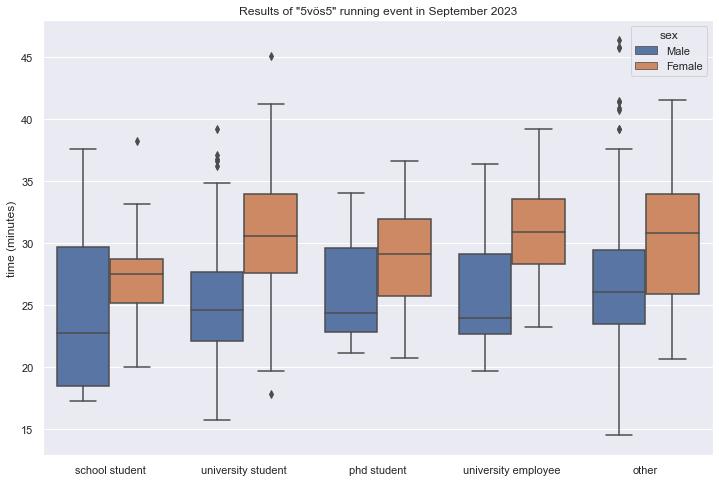

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
boxplot = sns.boxplot(data=df, x='job_title', y='time', hue='sex', order=['school student','university student','phd student','university employee','other'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=0)
boxplot.set_xlabel('')
boxplot.set_ylabel('time (minutes)')
boxplot.set_title('Results of "5vös5" running event in September 2023')
print(boxplot)

Congrats to school students, and phd student ladies!

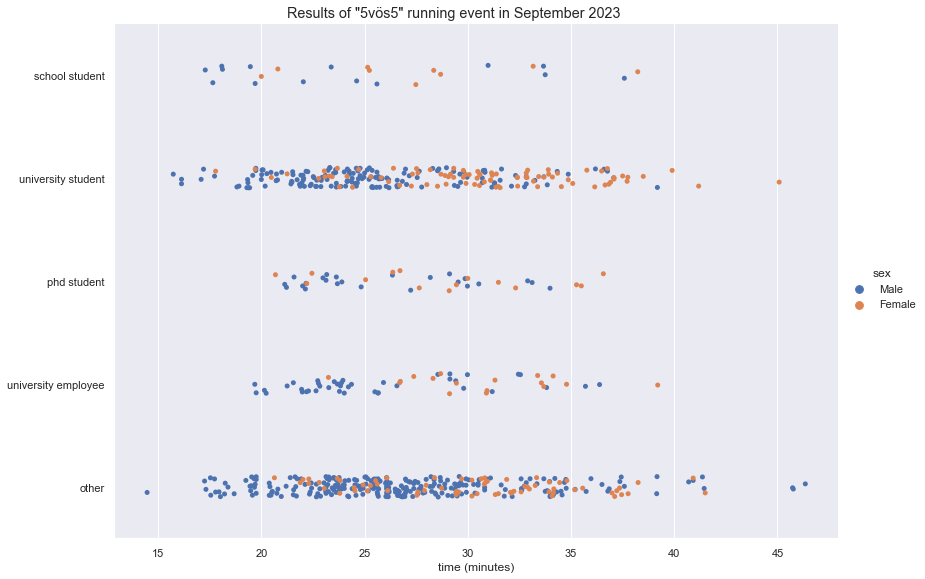

In [16]:
strip_plot = sns.catplot(data=df, y='job_title', x='time', hue='sex', order=['school student','university student','phd student','university employee','other'], height=8, aspect=1.5, kind='strip')
strip_plot.fig.subplots_adjust(top=0.95)
strip_plot.axes[0,0].set_ylabel('')
strip_plot.axes[0,0].set_xlabel('time (minutes)')
strip_plot.fig.suptitle('Results of "5vös5" running event in September 2023')
strip_plot

Let's explore the ELTE -- other and the university student/employee -- other comparisons as well. In our case these two are almost the same.

<AxesSubplot:title={'center':'Results of "5vös5" running event in September 2023'}, ylabel='time (minutes)'>

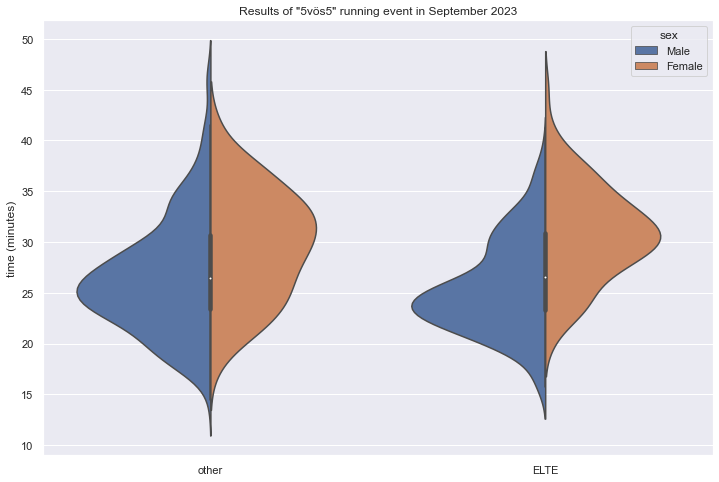

In [17]:
df['ELTE'] = df['organization'].apply(lambda x: 'ELTE' if x == 'Eötvös Loránd Tudományegyetem' else 'other')
sns.set(rc={'figure.figsize':(12,8)})
elte_violin = sns.violinplot(data=df, x='ELTE', y='time', hue='sex', split = True)
elte_violin.set_xticklabels(elte_violin.get_xticklabels(), rotation=0)
elte_violin.set_xlabel('')
elte_violin.set_ylabel('time (minutes)')
elte_violin.set_title('Results of "5vös5" running event in September 2023')
elte_violin

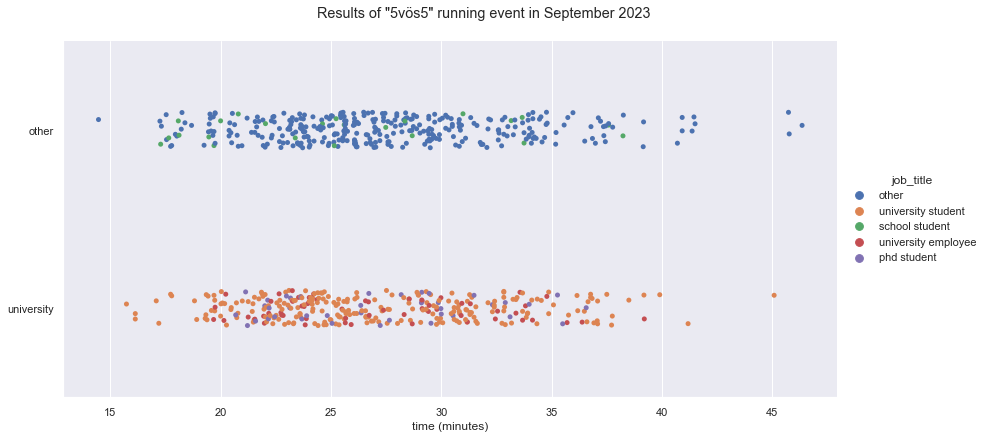

In [18]:
df['university'] = df['org_type'].apply(lambda x: 'university' if x == 'university' else 'other')
uni_strip = sns.catplot(data=df, x='time', y='university', kind='strip', height=6, aspect=2, hue='job_title')
uni_strip.fig.subplots_adjust(top=0.9)
uni_strip.axes[0,0].set_ylabel('')
uni_strip.axes[0,0].set_xlabel('time (minutes)')
uni_strip.fig.suptitle('Results of "5vös5" running event in September 2023')
uni_strip

Thanks for scrolling through, and congrats to all participants!